In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as st

In [2]:
df=pd.read_csv("dataset w7.csv")

In [3]:
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


# Carrying out the descriptive analytics

Checking for null values

In [4]:
df.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

There are no null values in the dataset

In [5]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [6]:
df1=df.groupby("Gender")["Total Marks"]
df1.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


The data after grouping based gender shows that more students were females and there is no much variations 
in scoring marks between the male and female students.

In [7]:
df2=df.groupby("Test preparation")["Total Marks"]
df2.describe()

,count,mean,std,min,25%,50%,75%,max
Test preparation,,,,,,,,
completed,7.0,44.571429,3.359422,40.0,43.0,44.0,46.0,50.0
none,21.0,28.238095,11.661495,12.0,18.0,27.0,38.0,48.0


The data after grouping based Test preparation shows that most of the students did not 
undergo test preparation and there is great standard deviation value for them comparing to the ones who prepared.
Also the max and min marks for those who undergone test preparation is between 40 and 50 marks.

# Check whether female and male students scored the same marks.

# Setting Hypothesis

Null hypothesis, H0: Female and male students scored the same marks.

Alternative hypothesis, H1: Female and male students didnot score the same marks.

In [8]:
male_students=df.loc[df["Gender"]=="male"]
female_students=df.loc[df["Gender"]=="female"]
male_students_score=male_students[["Total Marks"]]
female_students_score=female_students[["Total Marks"]]
male_mean=st.mean(male_students_score["Total Marks"])
female_mean=st.mean(male_students_score["Total Marks"])

In [9]:
from scipy.stats import ttest_ind
alpha=.05

t_score,p_value = ttest_ind(male_students_score,female_students_score)
print('T-test value is :',t_score)
print('P value is :',p_value)

if p_value > alpha:
    print('Fails to reject null hypothesis')
else:
    print('Rejecting null hypothesis')

T-test value is : [-0.69408853]
P value is : [0.49378223]
Fails to reject null hypothesis


The t-test shows that we accept the null hypothesis ie Female and male students scored almost same marks

# Whether test preparation helps the students

Null hypothesis, H0: Test preparation help the students to score better marks.

Alternative hypothesis, H1: Test preparation didnot help the students to score better marks.


In [10]:
test_prep_done=df.loc[df["Test preparation"]=="completed"]
test_prep_done

,Gender,Test preparation,Total Marks
5,female,completed,40
10,male,completed,44
12,male,completed,43
16,female,completed,48
21,male,completed,44
26,female,completed,50
27,female,completed,43


In [11]:
test_prep_no=df.loc[df["Test preparation"]=="none"]
test_prep_no

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24
11,male,none,23


C:\Users\ollak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


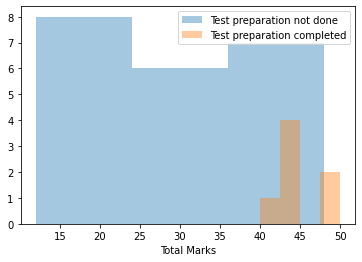

In [12]:
sns.distplot(test_prep_no["Total Marks"],kde=False,label="Test preparation not done")
sns.distplot(test_prep_done["Total Marks"],kde=False,label="Test preparation completed")
plt.legend()
plt.show()

The distribution plot shows that students who have completed test preparation scored above 40marks and full marks.

It shows that test preparation definitely helped the students to score better marks.

# Test Statistics

In [13]:
mean1=test_prep_done["Total Marks"].mean()
mean1

44.57142857142857

In [14]:
mean2=test_prep_no["Total Marks"].mean()
mean2

28.238095238095237

In [15]:
net_diff_mean=mean1-mean2
net_diff_mean

16.333333333333332

Smaller value of net_diff_mean indicates that the alternative hypothesis is better supported.

Larger value of net_diff_mean indicates that the null hypothesis is better supported.

Here net_diff_mean value is larger ie 16.33 which indicates that we fail to reject Null hypothesis and concluded that Test preparation definitely helped the students to score better marks.

# Alternative conclusion 

Null hypothesis, H0: Test preparation didnot help the students to score better marks.

Alternative hypothesis, H1: Test preparation helped the students to score better marks.

In [16]:
test_prep_done=test_prep_done[["Total Marks"]]
test_prep_no=test_prep_no[["Total Marks"]]

In [17]:
alpha=.05

t_score,p_value = ttest_ind(test_prep_done,test_prep_no)
print('T-test value is :',t_score)
print('P value is :',p_value)

if p_value > alpha:
    print('Fails to reject null hypothesis')
else:
    print('Rejecting null hypothesis')

T-test value is : [3.61436375]
P value is : [0.00126713]
Rejecting null hypothesis


T test shows that Test preparation helped the students to score better marks.